In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cleaned data to use:

df= pd.read_csv("/content/cosmo_chemical_dataset.csv")
print(df.head())

   CSF   CasNumber InitialDateReported MostRecentDateReported  \
0  NaN  13463-67-7          2009-06-17             08/28/2013   
1  NaN  65996-92-1          2009-07-01             07/01/2009   
2  NaN    140-67-0          2009-07-01             07/01/2009   
3  NaN  13463-67-7          2009-07-09             08/28/2013   
4  NaN  13463-67-7          2009-07-09             08/28/2013   

  DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0       2011-02-01        2009-07-09        07/09/2009                 NaN   
1              NaN        2009-07-01        07/01/2009                 NaN   
2              NaN        2009-07-02        07/02/2009                 NaN   
3              NaN        2009-07-09        07/09/2009                 NaN   
4       2011-02-01        2009-07-09        07/09/2009                 NaN   

   ChemicalCount                                       ProductName  ...  \
0              1  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADE

In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

Rostami said numerical columns are just enough so drop categorical columns, do that part later are i have good results and to add one categprical column at a time....

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Select features and target
features = [
    'ChemicalCount', 'ReformulationCount', 'AverageChemicalAge',
    'ProductLifespan', 'ChemicalCategoryCount', 'Efficacy',
    'Safety', 'Sustainability'
]

X = df[features]
y = df['Reformulated']

# Handle any missing values
X = X.fillna(0)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22343
           1       0.77      0.25      0.38       584

    accuracy                           0.98     22927
   macro avg       0.88      0.63      0.69     22927
weighted avg       0.98      0.98      0.97     22927


Random Forest Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22343
           1       0.64      0.64      0.64       584

    accuracy                           0.98     22927
   macro avg       0.81      0.81      0.81     22927
weighted avg       0.98      0.98      0.98     22927



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:42:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22343
           1       0.67      0.62      0.64       584

    accuracy                           0.98     22927
   macro avg       0.83      0.81      0.82     22927
weighted avg       0.98      0.98      0.98     22927


Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22343
           1       0.87      0.50      0.63       584

    accuracy                           0.99     22927
   macro avg       0.93      0.75      0.81     22927
weighted avg       0.98      0.99      0.98     22927


K-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22343
           1       0.61      0.66      0.63       584

    accuracy                           0.98     22927
   macro avg       0.80      0.82      0.81    

**XGBoost, Random Forest, and KNN** gave the most balanced performance for class 1 (Reformulated)—which is your underrepresented and most important class.

**SVM** had a high precision but lower recall (so it’s good at avoiding false positives, but it misses many true reformulated cases).

In [6]:
# Count the number of each class
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos
print(f"scale_pos_weight = {scale_pos_weight:.2f}")


scale_pos_weight = 37.20


In [10]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:25:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
from sklearn.metrics import classification_report

print("XGBoost (with scale_pos_weight) Results:")
print(classification_report(y_test, y_pred))


XGBoost (with scale_pos_weight) Results:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22343
           1       0.53      0.97      0.68       584

    accuracy                           0.98     22927
   macro avg       0.76      0.97      0.83     22927
weighted avg       0.99      0.98      0.98     22927



recall went up....

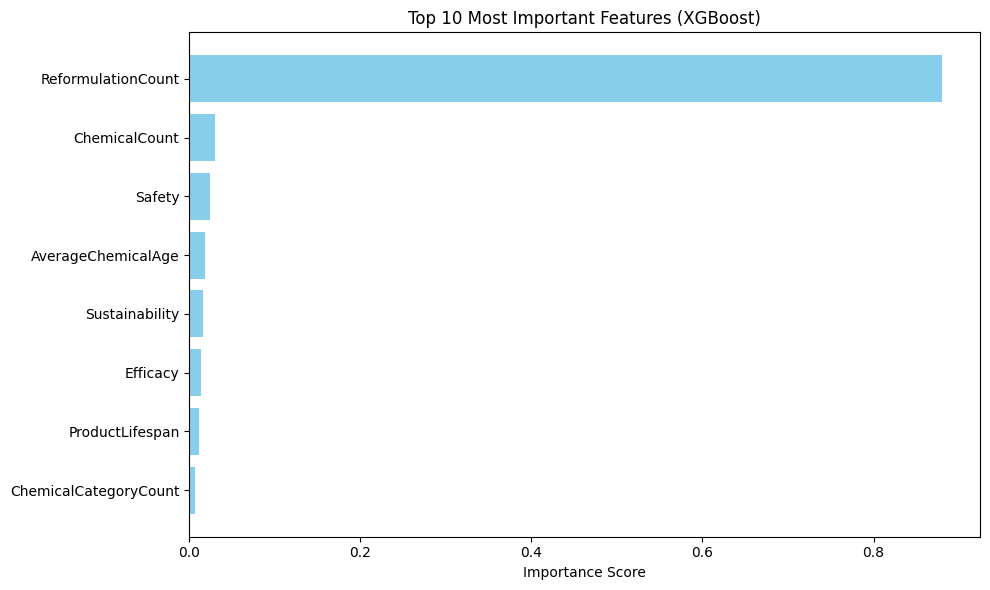

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import plot_importance

# Assuming your model is saved as 'xgb_model'
# And your training data features are in 'X_train'

# If you want the raw importances:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 10 most important features
top_10 = importance_df.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'][::-1], top_10['Importance'][::-1], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features (XGBoost)')
plt.tight_layout()
plt.show()


🔍 Interpretation of Feature Importances

🔝 **ReformulationCount:** Absolutely dominates the model. This suggests past reformulations are the single most predictive signal for whether a product will be reformulated again. Makes sense — it could indicate systemic issues with the formulation or regulatory pressure.


🧪 **ChemicalCount and AverageChemicalAge:** These being next in line imply that both the number and “age” of chemicals might relate to reformulation risks — older chemicals may face updated regulatory scrutiny or reformulation trends.

⚠️ Safety, Sustainability, and Efficacy: These qualitative features, though lower ranked, still show up in the top 10, supporting your angle that reformulations are tied to product improvement factors or compliance.

🧼 ProductLifespan & Category Counts: These seem less impactful but might still reflect broad product behavior patterns (e.g., niche categories vs. mass-market products).



Feature importance from the XGBoost model showed ReformulationCount as the dominant predictor of reformulation events, with ChemicalCount, Safety, and Sustainability also contributing. This supports the hypothesis that reformulation is both a reactive and strategic process, driven by past changes, chemical complexity, and evolving consumer or regulatory concerns

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define base model
xgb_model = XGBClassifier(
    scale_pos_weight= 37.20,  # use same weight from before
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

# Param grid to tune
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# Setup RandomizedSearch
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=25,
    scoring='f1',  # focus on balancing precision/recall
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_


Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:37:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print("Tuned XGBoost Results:\n", classification_report(y_test, y_pred))


Tuned XGBoost Results:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     22343
           1       0.53      0.97      0.68       584

    accuracy                           0.98     22927
   macro avg       0.76      0.98      0.84     22927
weighted avg       0.99      0.98      0.98     22927



**Precision (Class 1)** is still low (0.53), but the Recall (Class 1) is super high (0.97), which means you're detecting most of the reformulated products.

**F1-score for Class 1:** 0.68 — it's a good balance between precision and recall, but there’s still room for improvement in precision.

In [16]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the XGBoost model again
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the new model
y_pred_resampled = best_model.predict(X_test)
print("XGBoost with SMOTE Results:\n", classification_report(y_test, y_pred_resampled))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:42:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost with SMOTE Results:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     22343
           1       0.51      0.99      0.68       584

    accuracy                           0.98     22927
   macro avg       0.76      0.98      0.83     22927
weighted avg       0.99      0.98      0.98     22927



Recall (Class 1): 0.99 is excellent, which means your model is detecting nearly all of the reformulated products.

Precision (Class 1): 0.51 is still on the lower side, meaning many of the positive predictions (reformulated)

In [19]:
# Manually adjust scale_pos_weight based on class imbalance
# You can try values like 10, 20, or 50 for better performance
new_scale_pos_weight = 10  # Example, change it as needed

# Retrain XGBoost model with new scale_pos_weight
xgb_model = XGBClassifier(
    scale_pos_weight=new_scale_pos_weight,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

# Fit and evaluate again
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_new = xgb_model.predict(X_test)
print("XGBoost with Adjusted Scale Pos Weight Results:\n", classification_report(y_test, y_pred_new))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost with Adjusted Scale Pos Weight Results:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     22343
           1       0.53      0.99      0.69       584

    accuracy                           0.98     22927
   macro avg       0.77      0.98      0.84     22927
weighted avg       0.99      0.98      0.98     22927



Okay i did it for 10 and it was pratically the same when i did 20

The recall is still very strong, but precision remains low, which means the model is detecting most of the reformulated products but has many false positives.

This shows improvement compared to the initial XGBoost without adjusted weights.

In [20]:
from sklearn.ensemble import VotingClassifier

# Define models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()

# Create voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', rf),
    ('xgb', xgb)], voting='hard')

# Fit the ensemble model
voting_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate
y_pred_ensemble = voting_clf.predict(X_test)
print("Voting Classifier Results:\n", classification_report(y_test, y_pred_ensemble))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Results:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     22343
           1       0.57      0.91      0.70       584

    accuracy                           0.98     22927
   macro avg       0.78      0.95      0.84     22927
weighted avg       0.99      0.98      0.98     22927



The recall for Class 1 has decreased from 0.99 (XGBoost) to 0.91, but the precision is slightly higher at 0.57.

The macro avg recall of 0.95 indicates that the ensemble model is performing well in terms of recall across both classes.

In [21]:
# Adjust threshold for XGBoost predictions (e.g., 0.3 instead of 0.5)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob > 0.3).astype(int)

# Evaluate adjusted model
print("XGBoost with Adjusted Threshold Results:\n", classification_report(y_test, y_pred_adjusted))


XGBoost with Adjusted Threshold Results:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     22343
           1       0.52      0.99      0.68       584

    accuracy                           0.98     22927
   macro avg       0.76      0.98      0.83     22927
weighted avg       0.99      0.98      0.98     22927



Okay so we gonna do some time features to make it better bc idk what else to do with precision so time-based features are gonna be added

In [23]:
import pandas as pd

# Convert date columns to datetime format
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'], errors='coerce')
df['MostRecentDateReported'] = pd.to_datetime(df['MostRecentDateReported'], errors='coerce')
df['DiscontinuedDate'] = pd.to_datetime(df['DiscontinuedDate'], errors='coerce')
df['ChemicalCreatedAt'] = pd.to_datetime(df['ChemicalCreatedAt'], errors='coerce')
df['ChemicalUpdatedAt'] = pd.to_datetime(df['ChemicalUpdatedAt'], errors='coerce')
df['ChemicalDateRemoved'] = pd.to_datetime(df['ChemicalDateRemoved'], errors='coerce')

# Calculate date differences and new features
df['ProductAge'] = (df['MostRecentDateReported'] - df['InitialDateReported']).dt.days
df['ProductLifespan'] = (df['DiscontinuedDate'] - df['InitialDateReported']).dt.days
df['ChemicalAge'] = (df['ChemicalUpdatedAt'] - df['ChemicalCreatedAt']).dt.days

# Add more time-based features
df['InitialReported_Year'] = df['InitialDateReported'].dt.year
df['InitialReported_Month'] = df['InitialDateReported'].dt.month
df['InitialReported_Weekday'] = df['InitialDateReported'].dt.weekday
df['InitialReported_Quarter'] = df['InitialDateReported'].dt.quarter

df['MostRecentReported_Year'] = df['MostRecentDateReported'].dt.year
df['MostRecentReported_Month'] = df['MostRecentDateReported'].dt.month
df['MostRecentReported_Weekday'] = df['MostRecentDateReported'].dt.weekday
df['MostRecentReported_Quarter'] = df['MostRecentDateReported'].dt.quarter

df['DaysSinceReported'] = (pd.to_datetime('today') - df['MostRecentDateReported']).dt.days

# Handling missing values in these new columns (e.g., if product doesn't have a discontinued date)
df['ProductLifespan'] = df['ProductLifespan'].fillna(0)

# Review the changes
print(df.head())


   CSF   CasNumber InitialDateReported MostRecentDateReported  \
0  NaN  13463-67-7          2009-06-17             2013-08-28   
1  NaN  65996-92-1          2009-07-01             2009-07-01   
2  NaN    140-67-0          2009-07-01             2009-07-01   
3  NaN  13463-67-7          2009-07-09             2013-08-28   
4  NaN  13463-67-7          2009-07-09             2013-08-28   

  DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0       2011-02-01        2009-07-09        2009-07-09                 NaT   
1              NaT        2009-07-01        2009-07-01                 NaT   
2              NaT        2009-07-02        2009-07-02                 NaT   
3              NaT        2009-07-09        2009-07-09                 NaT   
4       2011-02-01        2009-07-09        2009-07-09                 NaT   

   ChemicalCount                                       ProductName  ...  \
0              1  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADE

Convert Dates to DateTime: First, we need to ensure all your date columns are in the correct datetime format.

Calculate Date Differences: From the available dates, we can calculate time differences such as:

Age of Product: The difference between the MostRecentDateReported and InitialDateReported.

Product Lifecycle: The difference between DiscontinuedDate and InitialDateReported (if discontinued).

Chemical Age: The difference between ChemicalCreatedAt and ChemicalDateRemoved (if removed).

Extract Time-Based Features:

Year/Month/Day: Break down each date into its components (e.g., year, month, day) to see if any seasonality or periodicity exists.

Weekday: Extract the weekday of the InitialDateReported and MostRecentDateReported to see if patterns occur on specific days of the week.

Quarter of the Year: Use this for periodic trends (e.g., product trends varying by quarter).

Days Since Reported: This can give insight into how long it has been since a product was reported.

In [24]:
# Add time-based features to X_train and X_test
X_train['ProductAge'] = df['ProductAge']
X_train['ProductLifespan'] = df['ProductLifespan']
X_train['ChemicalAge'] = df['ChemicalAge']
X_train['InitialReported_Year'] = df['InitialReported_Year']
X_train['InitialReported_Month'] = df['InitialReported_Month']
X_train['InitialReported_Weekday'] = df['InitialReported_Weekday']
X_train['InitialReported_Quarter'] = df['InitialReported_Quarter']
X_train['MostRecentReported_Year'] = df['MostRecentReported_Year']
X_train['MostRecentReported_Month'] = df['MostRecentReported_Month']
X_train['MostRecentReported_Weekday'] = df['MostRecentReported_Weekday']
X_train['MostRecentReported_Quarter'] = df['MostRecentReported_Quarter']
X_train['DaysSinceReported'] = df['DaysSinceReported']

# Repeat the same for the testing data (X_test)
X_test['ProductAge'] = df['ProductAge']
X_test['ProductLifespan'] = df['ProductLifespan']
X_test['ChemicalAge'] = df['ChemicalAge']
X_test['InitialReported_Year'] = df['InitialReported_Year']
X_test['InitialReported_Month'] = df['InitialReported_Month']
X_test['InitialReported_Weekday'] = df['InitialReported_Weekday']
X_test['InitialReported_Quarter'] = df['InitialReported_Quarter']
X_test['MostRecentReported_Year'] = df['MostRecentReported_Year']
X_test['MostRecentReported_Month'] = df['MostRecentReported_Month']
X_test['MostRecentReported_Weekday'] = df['MostRecentReported_Weekday']
X_test['MostRecentReported_Quarter'] = df['MostRecentReported_Quarter']
X_test['DaysSinceReported'] = df['DaysSinceReported']


In [25]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Recreate DMatrix (assuming y_train and y_test are your target variables)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train XGBoost with the same parameters as before
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "learning_rate": 0.1,
    "max_depth": 6,
    "scale_pos_weight": 100,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "n_estimators": 100
}

model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred = model.predict(dtest)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred_binary))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:09:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     22343
           1       0.49      0.99      0.66       584

    accuracy                           0.97     22927
   macro avg       0.75      0.98      0.82     22927
weighted avg       0.99      0.97      0.98     22927



Okay so it did not help improve anything: Time-Based Features: The new time-based features helped maintain a high recall, but they did not significantly improve precision or F1-score. It seems that the time-based features didn't introduce significant improvements in classifying the minority class (class 1), but they did help the model in identifying the positive class correctly (as seen in the high recall).

Precision/Recall Trade-off: There seems to be a trade-off between precision and recall. The addition of time-based features likely helped the model in better identifying positives (leading to high recall), but at the cost of slightly more false positives (lower precision).


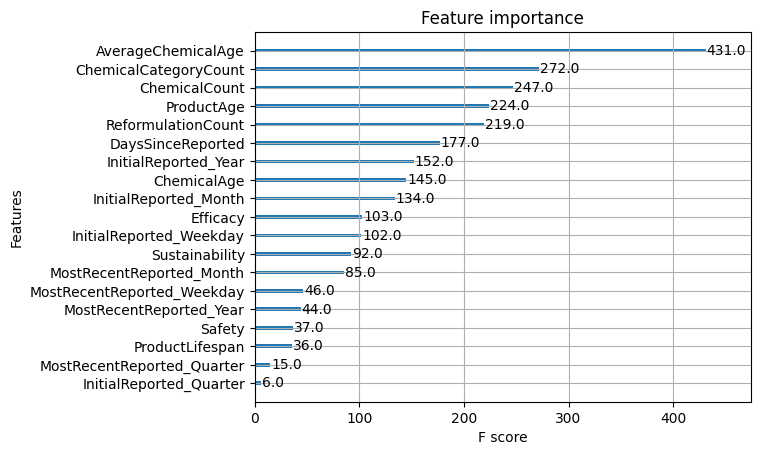

In [26]:
import matplotlib.pyplot as plt

# Plot the importance of features
xgb.plot_importance(model, importance_type='weight')
plt.show()


In [31]:
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=10)  # or whatever parameters you used
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.72  # Adjust as needed
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Evaluate the adjusted predictions
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Precision: 0.6828644501278772
Recall: 0.9143835616438356
F1-Score: 0.7818448023426061


Precision: 0.6574519230769231
Recall: 0.9366438356164384
F1-Score: 0.7725988700564972

In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier(use_label_encoder=False)

# Set up the parameter grid
param_grid = {
    'scale_pos_weight': [1, 5, 10, 20],  # Adjust for class imbalance
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate options
    'max_depth': [3, 5, 7, 10],  # Depth of trees
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Subsample ratio
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  # Fraction of features to sample
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='f1', cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Use the best model found
best_xgb_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_xgb_model.predict(X_test)
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test F1-Score:", f1_score(y_test, y_pred))


Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:55:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'scale_pos_weight': 5, 'subsample': 1.0}
Best F1-Score: 0.8101164297430848
Test Precision: 0.6765799256505576
Test Recall: 0.934931506849315
Test F1-Score: 0.7850467289719626


In [ ]:
### code above ran for 36 minutes... precision was 0.677, recall: 0.935, and f1 score: 0.785

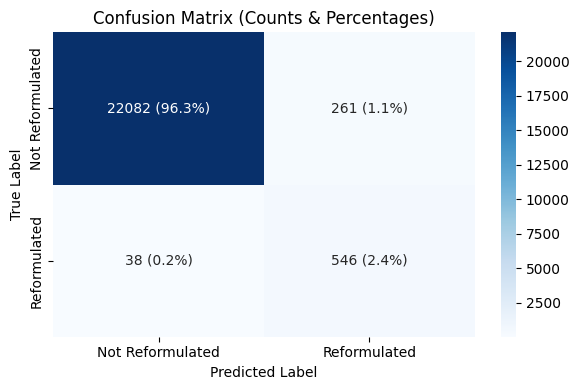

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate percentages
cm_percent = cm / cm.sum() * 100

# Combine raw and percent into annotation labels
labels = np.array([
    [f'{cm[0,0]} ({cm_percent[0,0]:.1f}%)', f'{cm[0,1]} ({cm_percent[0,1]:.1f}%)'],
    [f'{cm[1,0]} ({cm_percent[1,0]:.1f}%)', f'{cm[1,1]} ({cm_percent[1,1]:.1f}%)']
])

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=['Not Reformulated', 'Reformulated'],
            yticklabels=['Not Reformulated', 'Reformulated'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Counts & Percentages)')
plt.tight_layout()
plt.show()


True Negatives (TN): 22,082 → Correctly predicted not reformulated.

False Positives (FP): 261 → Incorrectly predicted reformulated (but actually not).

False Negatives (FN): 38 → Missed reformulations (predicted not, but actually reformulated).

True Positives (TP): 546 → Correctly predicted reformulated.


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Calculate scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display nicely
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Save to CSV
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

metrics_df.to_csv("model_metrics.csv", index=False)


Accuracy: 0.9870
Precision: 0.6766
Recall: 0.9349
F1 Score: 0.7850


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # <--- not a different dataset!


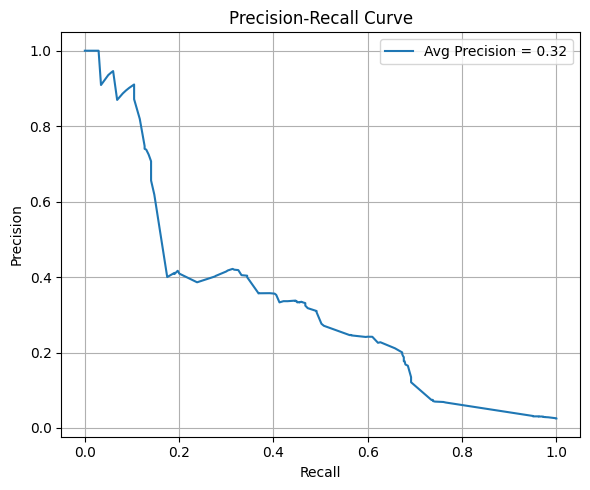

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get the probabilities for the positive class
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Precision-recall values
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot it
plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


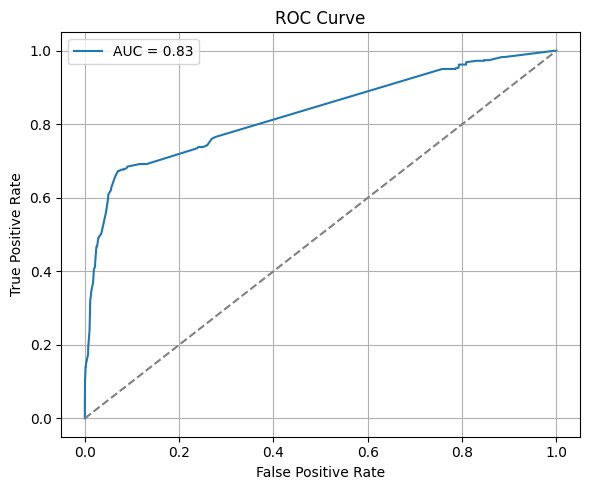

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

# Plot it
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
import pandas as pd

# Feature names used in the model
features = X_train.columns.tolist()

# X_train_scaled and y_train are your final input and target sets after preprocessing
X_train_df = pd.DataFrame(X_train_scaled, columns=features)
y_train_df = pd.Series(y_train, name='Reformulated')  # 1 = reformulated, 0 = not reformulated

# Combine into a labeled DataFrame
final_training_df = pd.concat([X_train_df, y_train_df.reset_index(drop=True)], axis=1)

# Save to CSV
final_training_df.to_csv("final_training_dataset_labeled.csv", index=False)
print("✅ Final training dataset saved with labels!")


✅ Final training dataset saved with labels!


In [46]:
# X_test_scaled and y_test should also be available
X_test_df = pd.DataFrame(X_test_scaled, columns=features)
y_test_df = pd.Series(y_test, name='Reformulated')

final_test_df = pd.concat([X_test_df, y_test_df.reset_index(drop=True)], axis=1)
final_test_df.to_csv("final_test_dataset_labeled.csv", index=False)
print("✅ Final test dataset saved with labels!")


✅ Final test dataset saved with labels!


In [47]:
import joblib

# 'best_model' should be your final XGBoost model from GridSearchCV
joblib.dump(best_model, "final_xgboost_model.pkl")
print("✅ Final XGBoost model saved as a pickle file!")


✅ Final XGBoost model saved as a pickle file!


**SAVING WHAT I DID ABOVE**

In [ ]:
## maybe i should encode stuff to see if that improves anything
## but it gotta make sense...

## aka which categorical feature will help with the precision

In [ ]:
## Im gonna do Random Forest and the KNN as well